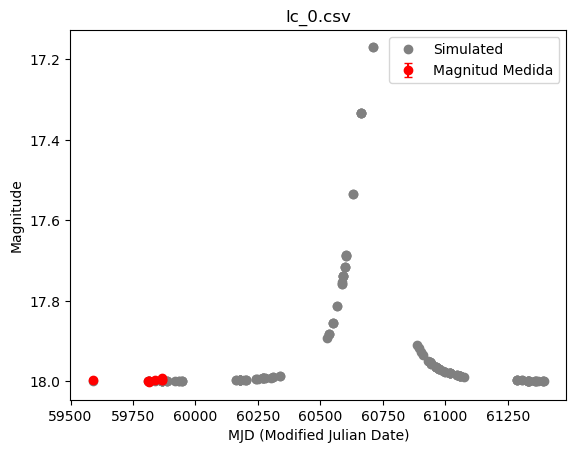

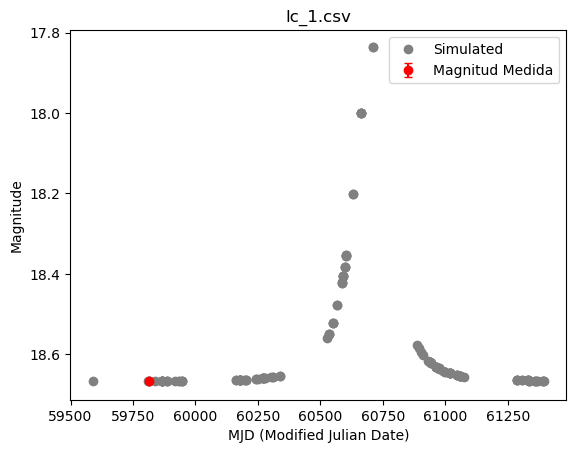

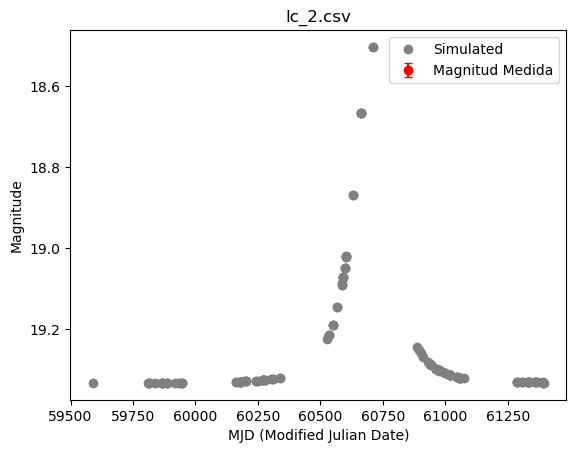

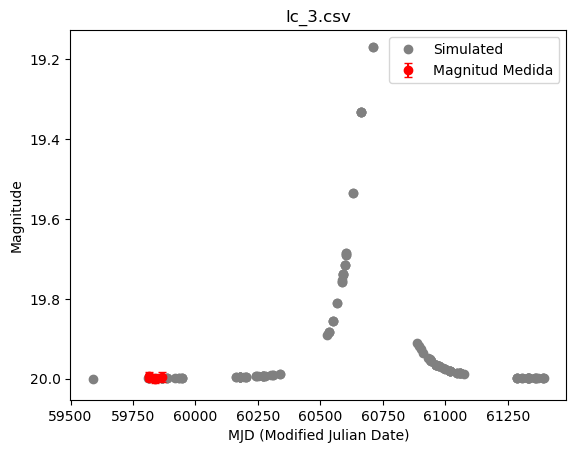

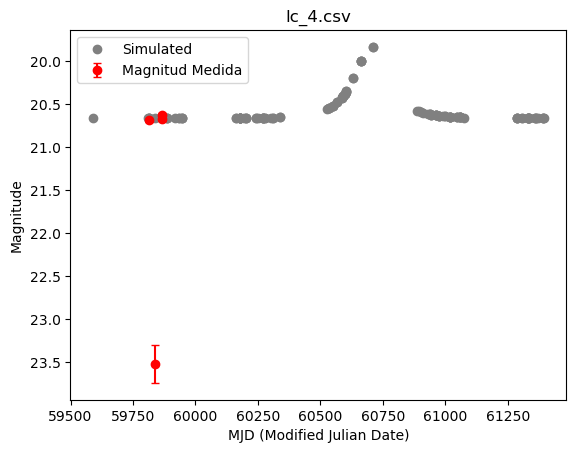

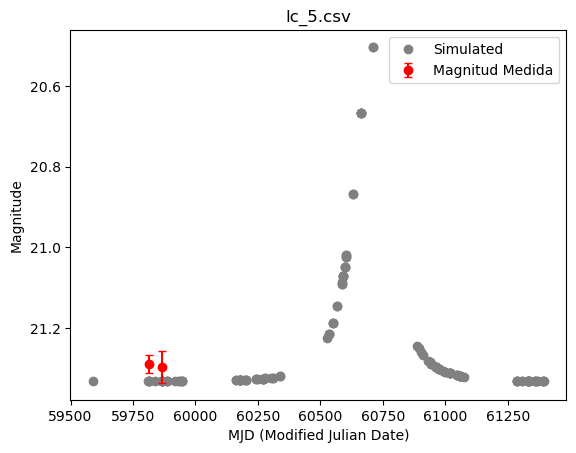

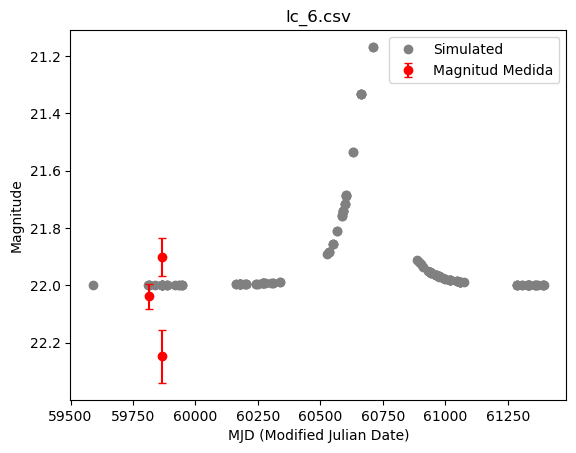

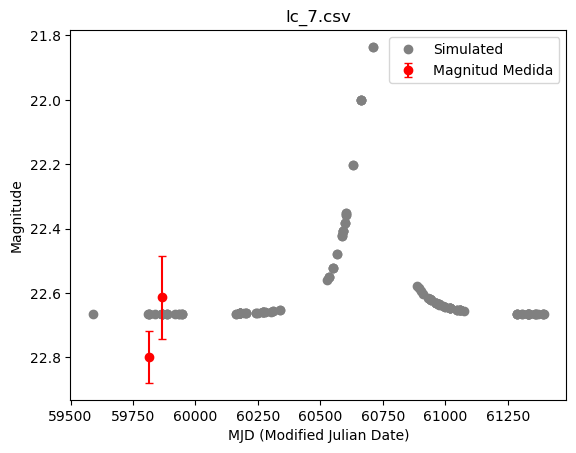

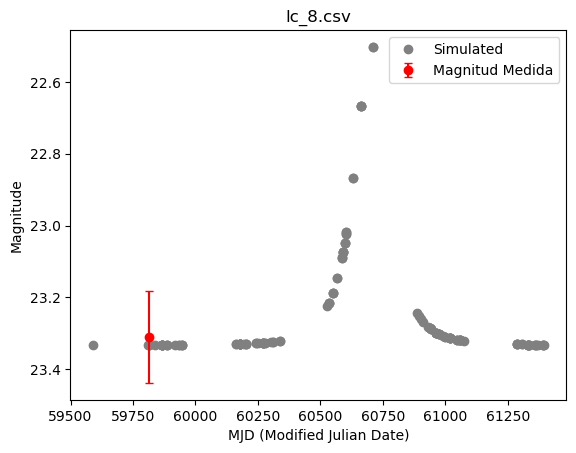

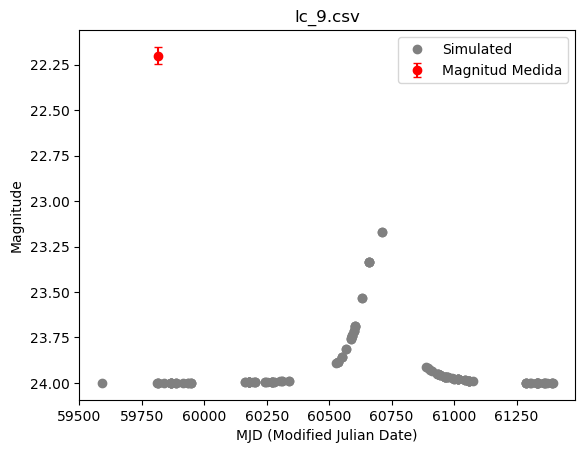

In [3]:
from light_curves import LightCurve
# Plot light curves from a run
import pandas as pd
n=10; lvl = 20
path = f"runs/run_{n}pts_{lvl}lvl/"
for lc_path in sorted([file for file in os.listdir(path) if file.startswith("lc")]):
    lc = LightCurve(data=pd.read_csv(path+lc_path))
    lc.plot(title = lc_path)


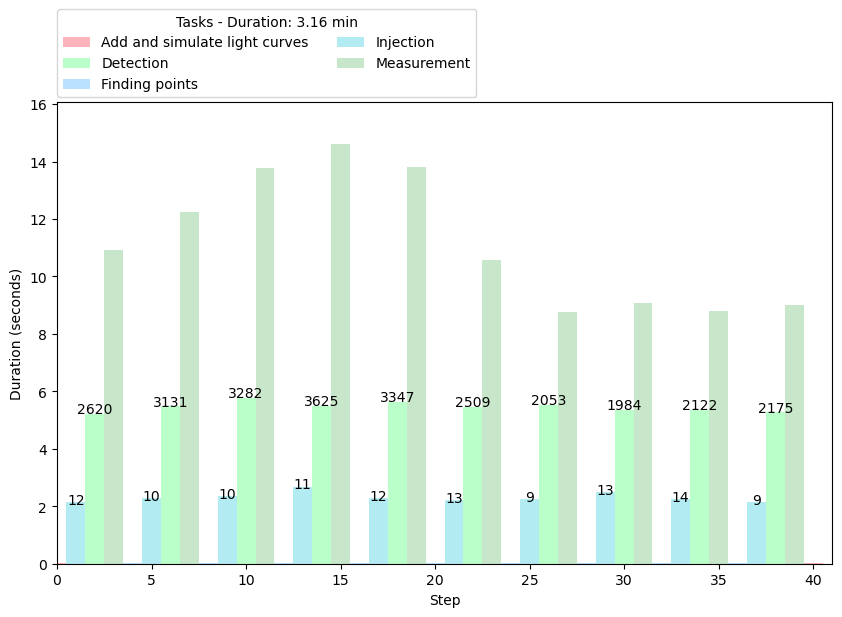

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
df = pd.read_csv("runs/run_30pts_20lvl/time_log.csv")

# Seleccionar las columnas y calcular duraciones
times = df["time"]
task_names = df["task"][2:]
details = df["detail"][2:]
duration = [j - i for i, j in zip(times[:-1], times[1:])][1:]
unique_tasks = sorted(set(task_names))
cmap = plt.get_cmap("tab20")
cmap = plt.get_cmap("Pastel1")
light_colors = [
    "#FFB3BA",  # Rosa claro
    "#BAFFC9",  # Verde menta claro
    "#BAE1FF",  # Azul celeste claro
    "#D1C4E9",  # Lavanda claro
    "#B2EBF2",  # Turquesa claro
    "#C8E6C9",  # Verde claro
    "#E1BEE7",  # Lila pastel
]

from matplotlib.colors import ListedColormap
cmap = ListedColormap(light_colors)
col_task = {task: cmap(i / len(unique_tasks)) for i, task in enumerate(unique_tasks)}
task_colors = [col_task[task] for task in task_names[:-1]]
plt.figure(figsize=(10, 6))
plt.xlim(0, len(duration))
plt.ylim(0, max(duration) * 1.1)

# Ajustar las barras para que tengan el mismo ancho y estén igualmente espaciadas
x_positions = np.arange(len(duration))
bar_width = 1
bars = plt.bar(x_positions, duration, color=task_colors, width=bar_width)

for i, (bar, detail, task) in enumerate(zip(bars, details, task_names)):
    if str(detail) != "nan" and task!= "Finding points":  # Solo agrega texto si `detail` no es None
        plt.text(bar.get_x() + bar.get_width() * 0.5, bar.get_height() * 1.03, 
                 f'{int(detail)}', ha='center', va='center', fontsize=10, color='black')

for task in unique_tasks:
    plt.bar(0, 0, color=col_task[task], label=task)

plt.xlabel("Step")
plt.ylabel("Duration (seconds)")
plt.legend(title=f'Tasks - Duration: {np.sum(duration) / 60:.2f} min', 
           ncol=min([6, len(unique_tasks) // 2]), loc=(0, 1.01))

# Guardar el gráfico
# plt.savefig(f'{self.main_path}time_analysis.png', bbox_inches='tight')
plt.show()


In [75]:
df = pd.read_csv("runs/run_30pts_20lvl/time_log.csv")
t = df["time"]-df["time"][0]
df["time"] = df["time"]-df["time"][0]

In [79]:
df

,task,time,detail
0,Start,0.000000,NaN
1,Plotting sky map,287.351199,NaN
2,Add and simulate light curves,287.370025,NaN
3,Injection,289.524994,12.0
4,Detection,294.749326,2620.0
5,Measurement,305.679543,NaN
6,Finding points,305.695309,12.0
7,Injection,307.973124,10.0
8,Detection,313.447808,3131.0
9,Measurement,325.705491,NaN


In [24]:
type(details[1])

numpy.float64

In [26]:
str(details[1])

'nan'